In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.6 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 
     |████████████████████████████████| 1.7 MB 12.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 52.5 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 134 kB 47.5 MB/s 
     |████████████████████████████████| 1.3 MB 23.3 MB/s 
     |████████████████████████████████| 167 kB 49.3 MB/s 
     |████████████████████████████████| 10.4 MB 36.7 MB/s 
     |████████████████████████████████| 3.3 MB 50.8 MB/s 
     |████████████████████████████████| 2.0 MB 42.9 MB/s 
     |████████████████████████████████| 17.0 MB 125 kB/s 
     |████████████████████████████████| 

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [4]:
import pandas as pd

dataset = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (184, 26)
Unseen Data For Predictions (21, 26)


In [6]:
from pycaret.regression import *

In [7]:
rli = setup(data = data, target = 'price', session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  log_experiment = True, experiment_name = 'car1') 

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(184, 26)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(128, 70)"


INFO:logs:Logging experiment in MLFlow
2022/09/06 18:02:03 INFO mlflow.tracking.fluent: Experiment with name 'car1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dummy', D

In [8]:
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1643.0485,6.020963e+06,2293.5023,0.8912,0.1460,0.1137,0.093
br,Bayesian Ridge,1666.0895,6.084766e+06,2337.5659,0.8853,0.1385,0.1116,0.021
ridge,Ridge Regression,1642.9934,6.116019e+06,2306.0760,0.8807,0.1393,0.1127,0.019
rf,Random Forest Regressor,1701.5161,6.439564e+06,2391.5600,0.8789,0.1521,0.1187,0.348
et,Extra Trees Regressor,1797.0743,6.576538e+06,2458.4303,0.8727,0.1530,0.1267,0.204
gbr,Gradient Boosting Regressor,1761.3241,7.001055e+06,2499.2772,0.8582,0.1511,0.1192,0.074
lightgbm,Light Gradient Boosting Machine,1845.6520,9.455314e+06,2722.4483,0.8394,0.1533,0.1194,0.104
omp,Orthogonal Matching Pursuit,1664.1509,6.660185e+06,2446.5856,0.8354,0.1526,0.1146,0.020
huber,Huber Regressor,1666.3429,7.433863e+06,2502.3751,0.7934,0.1509,0.1204,0.049
dt,Decision Tree Regressor,2182.8032,1.060477e+07,3113.7760,0.7868,0.2028,0.1527,0.021


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[PowerTransformedTargetRegressor(base_estimator=None, learning_rate=1.0,
                                loss='linear', n_estimators=50,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=1.0,
                                                            loss='linear',
                                                            n_estimators=50,
                                                            random_state=123)), PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                         

In [9]:
print(top3)

[PowerTransformedTargetRegressor(base_estimator=None, learning_rate=1.0,
                                loss='linear', n_estimators=50,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=1.0,
                                                            loss='linear',
                                                            n_estimators=50,
                                                            random_state=123)), PowerTransformedTargetRegressor(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                                compute_score=False, copy_X=True,
                                fit_intercept=True, lambda_1=1e-06,
                                lambda_2=1e-06, lambda_init=None, n_iter

In [10]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,700.5152,8.318704e+05,912.0693,0.9565,0.0692,0.0604
1,2684.4259,1.675207e+07,4092.9294,0.8813,0.1678,0.1448
2,1705.8412,5.484073e+06,2341.8099,0.7659,0.1671,0.1343
3,1894.6168,5.435764e+06,2331.4724,0.9236,0.1459,0.1236
4,1745.3529,7.328462e+06,2707.1133,0.8905,0.1873,0.1162
5,1721.3311,7.258962e+06,2694.2461,0.9104,0.1304,0.0841
6,1374.0826,2.687198e+06,1639.2676,0.9570,0.1488,0.1232
7,2186.6214,9.532085e+06,3087.4075,0.8428,0.2091,0.1489
8,1167.2572,2.297290e+06,1515.6813,0.8414,0.1235,0.1056


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(base_estimator=None, learning_rate=1.0,
                                loss='linear', n_estimators=50,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=1.0,
                                                            loss='linear',
                                                            n_estimators=50,
                                                            random_state=123))
INFO:logs:create_model() succesfully completed......................................


In [11]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,609.1664,8.286434e+05,910.2985,0.9567,0.0680,0.0524
1,2647.5326,1.662238e+07,4077.0551,0.8822,0.1662,0.1310
2,1653.2952,5.463736e+06,2337.4636,0.7667,0.1613,0.1282
3,1579.4154,3.403069e+06,1844.7409,0.9522,0.1316,0.1135
4,1751.8955,7.588457e+06,2754.7155,0.8866,0.1875,0.1174
5,1746.5819,6.961075e+06,2638.3849,0.9140,0.1379,0.0953
6,1504.0209,3.296388e+06,1815.5959,0.9473,0.1658,0.1386
7,2314.1389,1.053232e+07,3245.3533,0.8264,0.2171,0.1596
8,1264.3700,2.727584e+06,1651.5399,0.8118,0.1333,0.1132


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                crit

In [14]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,738.3815,9.171000e+05,957.6534,0.9521,0.0777,0.0678
1,2481.5038,1.239313e+07,3520.3876,0.9122,0.1593,0.1430
2,1828.8076,5.897634e+06,2428.5046,0.7482,0.1780,0.1472
3,1788.8524,5.494785e+06,2344.0958,0.9228,0.1323,0.1137
4,1769.1164,7.867065e+06,2804.8289,0.8824,0.1894,0.1151
5,1596.0735,6.500930e+06,2549.6921,0.9197,0.1309,0.0853
6,1414.0009,2.793191e+06,1671.2843,0.9553,0.1480,0.1263
7,2171.1486,8.980767e+06,2996.7928,0.8519,0.2099,0.1551
8,1215.4830,2.567085e+06,1602.2125,0.8228,0.1274,0.1087


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:PowerTransformedTargetRegressor(base_estimator=None, learning_rate=0.4,
                                loss='square', n_estimators=130,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=AdaBoostRegressor(base_estimator=None,
                                                            learning_rate=0.4,
                                                            loss='square',
                                                            n_estimators=130,
                                                            random_state=123))
INFO:logs:tune_model() succesfully completed......................................


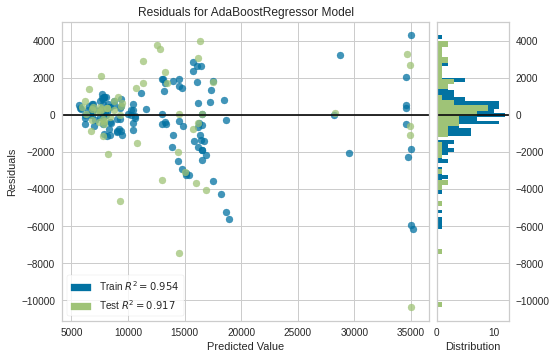

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_ada)

In [16]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1448.0769,4.539149e+06,2130.5279,0.7627,0.1722,0.1224
1,3241.8077,2.123409e+07,4608.0458,0.8496,0.2448,0.2011
2,2076.6923,1.037937e+07,3221.7022,0.5568,0.2353,0.1594
3,1778.8462,5.106449e+06,2259.7453,0.9282,0.1464,0.1267
4,2866.2692,1.776475e+07,4214.8250,0.7345,0.2769,0.1725
5,2705.6794,1.469538e+07,3833.4554,0.8185,0.1891,0.1387
6,1689.4615,3.792435e+06,1947.4176,0.9394,0.1726,0.1492
7,2362.6154,1.188475e+07,3447.4261,0.8041,0.2550,0.1774
8,1310.8473,3.329592e+06,1824.7170,0.7702,0.1384,0.1168


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:PowerTransformedTargetRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                presort='deprecated', random_state=123,
                                regressor=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                                  

In [17]:
bagged_dt = ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,781.4340,1.807683e+06,1344.5011,0.9055,0.0899,0.0626
1,2785.2416,1.754446e+07,4188.6104,0.8757,0.1773,0.1479
2,1686.9053,5.178793e+06,2275.6963,0.7789,0.1559,0.1296
3,1402.5670,2.805435e+06,1674.9432,0.9606,0.1218,0.1054
4,1584.2264,6.199933e+06,2489.9665,0.9073,0.1755,0.1094
5,1820.1953,8.286840e+06,2878.6872,0.8977,0.1339,0.0948
6,1632.9295,3.959146e+06,1989.7603,0.9367,0.1760,0.1430
7,2327.1975,1.011334e+07,3180.1474,0.8333,0.2137,0.1612
8,1382.4762,3.338556e+06,1827.1715,0.7696,0.1393,0.1234


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:PowerTransformedTargetRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fra

In [18]:
boosted_dt = ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,970.6923,1.787444e+06,1336.9533,0.9066,0.1240,0.0949
1,2861.8975,1.573864e+07,3967.1952,0.8885,0.1984,0.1719
2,2038.3077,7.792320e+06,2791.4727,0.6673,0.2042,0.1601
3,2116.9231,6.948473e+06,2635.9957,0.9024,0.1885,0.1550
4,2150.2692,9.362839e+06,3059.8757,0.8601,0.2242,0.1430
5,2150.2308,8.958594e+06,2993.0911,0.8894,0.1347,0.1098
6,1410.0769,2.711324e+06,1646.6099,0.9566,0.1507,0.1286
7,2544.6154,1.214936e+07,3485.5935,0.7997,0.2391,0.1790
8,1571.1527,3.900396e+06,1974.9420,0.7308,0.1504,0.1363


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 9
INFO:logs:PowerTransformedTargetRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fra

In [19]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,588.2669,7.737053e+05,879.6052,0.9595,0.0694,0.0543
1,2714.2374,1.704974e+07,4129.1335,0.8792,0.1713,0.1359
2,1658.5970,5.436528e+06,2331.6364,0.7679,0.1580,0.1282
3,1423.1655,3.138016e+06,1771.4445,0.9559,0.1287,0.1073
4,1807.7565,7.388309e+06,2718.1443,0.8896,0.1863,0.1186
5,1714.5978,6.957687e+06,2637.7428,0.9141,0.1386,0.0956
6,1693.7628,3.999818e+06,1999.9546,0.9360,0.1638,0.1422
7,2204.9056,9.860924e+06,3140.2107,0.8374,0.2138,0.1528
8,1182.2378,2.425372e+06,1557.3606,0.8326,0.1307,0.1102


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 10
INFO:logs:PowerTransformedTargetRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fr

# Blending


In [21]:
ada = create_model('ada', verbose = False)
dt = create_model('dt', verbose = False)
br = create_model('br', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ada, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:AdaBoost Regressor Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with KFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Creating Dashboard logs
INFO:logs:Model: AdaBoost Regressor
INFO:logs:logged params: {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 5

In [22]:
blender = blend_models(estimator_list = [ada, dt, br])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,890.2257,1.413704e+06,1188.9928,0.9261,0.0907,0.0754
1,2757.1670,1.530583e+07,3912.2660,0.8916,0.1708,0.1502
2,1725.5338,5.835609e+06,2415.7006,0.7508,0.1711,0.1320
3,1597.1886,3.784304e+06,1945.3286,0.9468,0.1175,0.1049
4,1801.0273,8.681137e+06,2946.3770,0.8703,0.2034,0.1195
5,1455.7012,4.978678e+06,2231.2950,0.9385,0.1174,0.0782
6,1282.9562,2.310693e+06,1520.0964,0.9631,0.1446,0.1196
7,2150.0716,9.548221e+06,3090.0196,0.8426,0.1954,0.1443
8,963.1512,1.969721e+06,1403.4674,0.8641,0.1019,0.0816


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 16
INFO:logs:PowerTransformedTargetRegressor(estimators=[('ada',
                                             AdaBoostRegressor(base_estimator=None,
                                                               learning_rate=1.0,
                                                               loss='linear',
                                                               n_estimators=50,
                                                               random_state=123)),
                                            ('dt',
                                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                                   criterion='mse',
                                                                   max_depth=None,
                                                                   max_features=None,
                                       

In [23]:
blender_top3 = blend_models(top3)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,606.4866,1.010468e+06,1005.2202,0.9472,0.0738,0.0541
1,2608.9965,1.360152e+07,3688.0235,0.9036,0.1525,0.1329
2,1380.2075,3.549898e+06,1884.1172,0.8484,0.1395,0.1071
3,1743.3759,6.276282e+06,2505.2508,0.9118,0.1329,0.1052
4,1578.6627,5.357272e+06,2314.5782,0.9199,0.1653,0.1058
5,1477.3424,3.663324e+06,1913.9811,0.9548,0.1034,0.0842
6,1531.6105,2.973575e+06,1724.4057,0.9525,0.1523,0.1351
7,2067.9956,8.781829e+06,2963.4151,0.8552,0.1664,0.1329
8,1176.7659,2.475806e+06,1573.4693,0.8291,0.1103,0.0945


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 17
INFO:logs:PowerTransformedTargetRegressor(estimators=[('ada',
                                             AdaBoostRegressor(base_estimator=None,
                                                               learning_rate=1.0,
                                                               loss='linear',
                                                               n_estimators=50,
                                                               random_state=123)),
                                            ('br',
                                             BayesianRidge(alpha_1=1e-06,
                                                           alpha_2=1e-06,
                                                           alpha_init=None,
                                                           compute_score=False,
                                                           copy_X=True